In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install kaggle library
!pip install kaggle

In [ ]:
# make a directory named kaggle
!mkdir ~/.kaggle

In [ ]:
# MAKE SURE TO UPLOAD THE JSON to the session storage or LOAD the JSON from Google Drive
# copy the api key file into the kaggle directory
# !cp kaggle.json ~/.kaggle/
# ( uncomment this if you are uploading the json in session storage)


# # for Convinience I am loading the JSON from the drive
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
# give the required permission(s) to the JSON file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the kaggle dataset
"""
The format of the command is as follows:
!kaggle CATEGORY download URL_TRIMMED_FROM_THE_DATAUPLOADER_USERID
  example :
  in this notebook we will use https://www.kaggle.com/datasets/denizkavi1/brain-tumor dataset,
  so now, this dataset belongs to the category 'datasets', it may however be a 'competition'
  dataset.
  so the url from 'denizkavi' is trimmed.
"""
! kaggle datasets download dansbecker/food-101

  1% 52.0M/9.38G [00:01<03:07, 53.5MB/s]
User cancelled operation


In [ ]:
import zipfile
import os

# I am prefering to extract the file to the session storage so to save the Drive Space.
zip_ref = zipfile.ZipFile('/content/food-101.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall('/content/food') # Extracts the file into the '/brain' folder
zip_ref.close()

BadZipFile: ignored

In [ ]:
import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

# Data Manipulation Tools
import numpy as np
import pandas as pd
import os

# Image manipulation
from PIL import Image

from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 16


In [ ]:
# Root ImagePath prefix
ImagePath = f"/content/food/food-101/food-101/images/"

In [ ]:
import os
import random
import shutil

# Set the paths to your dataset directory and the directory where you want to save the subset of images
dataset_dir = "/content/food/food-101/food-101/images"
subset_dir = "/content/tinyfood"

# Set the size of the subset you want to create (e.g., 10%)
subset_size_percentage = 10

# Create the subset directory if it doesn't exist
# os.makedirs(subset_dir, exist_ok=True)

# Iterate through the food categories in your dataset
for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)
    if os.path.isdir(category_path):
        # Create a directory for the category in the subset directory
        subset_category_dir = os.path.join(subset_dir, category)
        os.makedirs(subset_category_dir, exist_ok=True)

        # List all images in the category directory
        images = os.listdir(category_path)

        # Calculate the number of images to select for this category
        num_images = len(images)
        num_subset_images = (num_images * subset_size_percentage) // 100

        # Randomly select images and copy them to the subset directory
        selected_images = random.sample(images, num_subset_images)
        for image in selected_images:
            source_path = os.path.join(category_path, image)
            destination_path = os.path.join(subset_category_dir, image)
            shutil.copy(source_path, destination_path)


In [ ]:
# Root ImagePath prefix
ImagePath = f"/content/tinyfood/"

In [ ]:
# we will iterate for each folder(s) ( these folders here essentially denotes the categories of glucomas/dataset )
from glob import glob
types = glob(ImagePath + "*")

In [ ]:
print(len(types))
print(types)

101
['/content/tinyfood/bread_pudding', '/content/tinyfood/garlic_bread', '/content/tinyfood/clam_chowder', '/content/tinyfood/takoyaki', '/content/tinyfood/bruschetta', '/content/tinyfood/beignets', '/content/tinyfood/paella', '/content/tinyfood/lobster_bisque', '/content/tinyfood/hamburger', '/content/tinyfood/ramen', '/content/tinyfood/french_onion_soup', '/content/tinyfood/hummus', '/content/tinyfood/foie_gras', '/content/tinyfood/club_sandwich', '/content/tinyfood/sushi', '/content/tinyfood/french_toast', '/content/tinyfood/caesar_salad', '/content/tinyfood/bibimbap', '/content/tinyfood/fried_calamari', '/content/tinyfood/falafel', '/content/tinyfood/samosa', '/content/tinyfood/cup_cakes', '/content/tinyfood/caprese_salad', '/content/tinyfood/frozen_yogurt', '/content/tinyfood/sashimi', '/content/tinyfood/chicken_wings', '/content/tinyfood/tuna_tartare', '/content/tinyfood/tiramisu', '/content/tinyfood/dumplings', '/content/tinyfood/onion_rings', '/content/tinyfood/strawberry_shor

In [ ]:
filedf = pd.DataFrame()

for typ in types :
  image = glob( typ + "/*")
  tempdf = pd.DataFrame( {'imagepath' : image, 'types' : typ.split("/")[-1]} )
  filedf = pd.concat( [filedf, tempdf] ) # we may have used 'Append' however its computationally intensive and about to be depracated


In [ ]:
filedf.types.unique()

array(['bread_pudding', 'garlic_bread', 'clam_chowder', 'takoyaki',
       'bruschetta', 'beignets', 'paella', 'lobster_bisque', 'hamburger',
       'ramen', 'french_onion_soup', 'hummus', 'foie_gras',
       'club_sandwich', 'sushi', 'french_toast', 'caesar_salad',
       'bibimbap', 'fried_calamari', 'falafel', 'samosa', 'cup_cakes',
       'caprese_salad', 'frozen_yogurt', 'sashimi', 'chicken_wings',
       'tuna_tartare', 'tiramisu', 'dumplings', 'onion_rings',
       'strawberry_shortcake', 'nachos', 'huevos_rancheros',
       'chicken_curry', 'oysters', 'peking_duck', 'gyoza', 'omelette',
       'ceviche', 'cheesecake', 'beef_carpaccio', 'gnocchi',
       'fish_and_chips', 'pho', 'macarons', 'hot_dog', 'pad_thai',
       'pizza', 'pancakes', 'chocolate_mousse', 'seaweed_salad',
       'deviled_eggs', 'creme_brulee', 'spaghetti_carbonara', 'steak',
       'tacos', 'escargots', 'greek_salad', 'crab_cakes', 'poutine',
       'grilled_salmon', 'spring_rolls', 'fried_rice', 'filet_mig

In [ ]:
# Note that we will not make any changes to the original dataset now, rather we will create new ones from now on
# Group the data by 'types' column
grouped = filedf.groupby('types')

# Count only the 'imagepath' column for each group
counted = grouped['imagepath'].count()

# Rename the 'imagepath' column to 'cnt'
renamed = counted.rename('cnt')

# Reset the index
reset = renamed.reset_index()

# Sort the DataFrame by the 'cnt' column in descending order
sorted_df = reset.sort_values(by='cnt', ascending=False)

# Assign the resulting DataFrame to the 'gby_cnt' variable
grouped_count = sorted_df

grouped_count.head()

,types,cnt
0,apple_pie,100
64,miso_soup,100
74,peking_duck,100
73,panna_cotta,100
72,pancakes,100


In [ ]:
fig = px.bar( grouped_count, x = 'types', y = 'cnt', color = 'types', title = 'Counts from Each Type')
fig.show()

In [ ]:
!mkdir ouptputs # Create a Outputs Directory

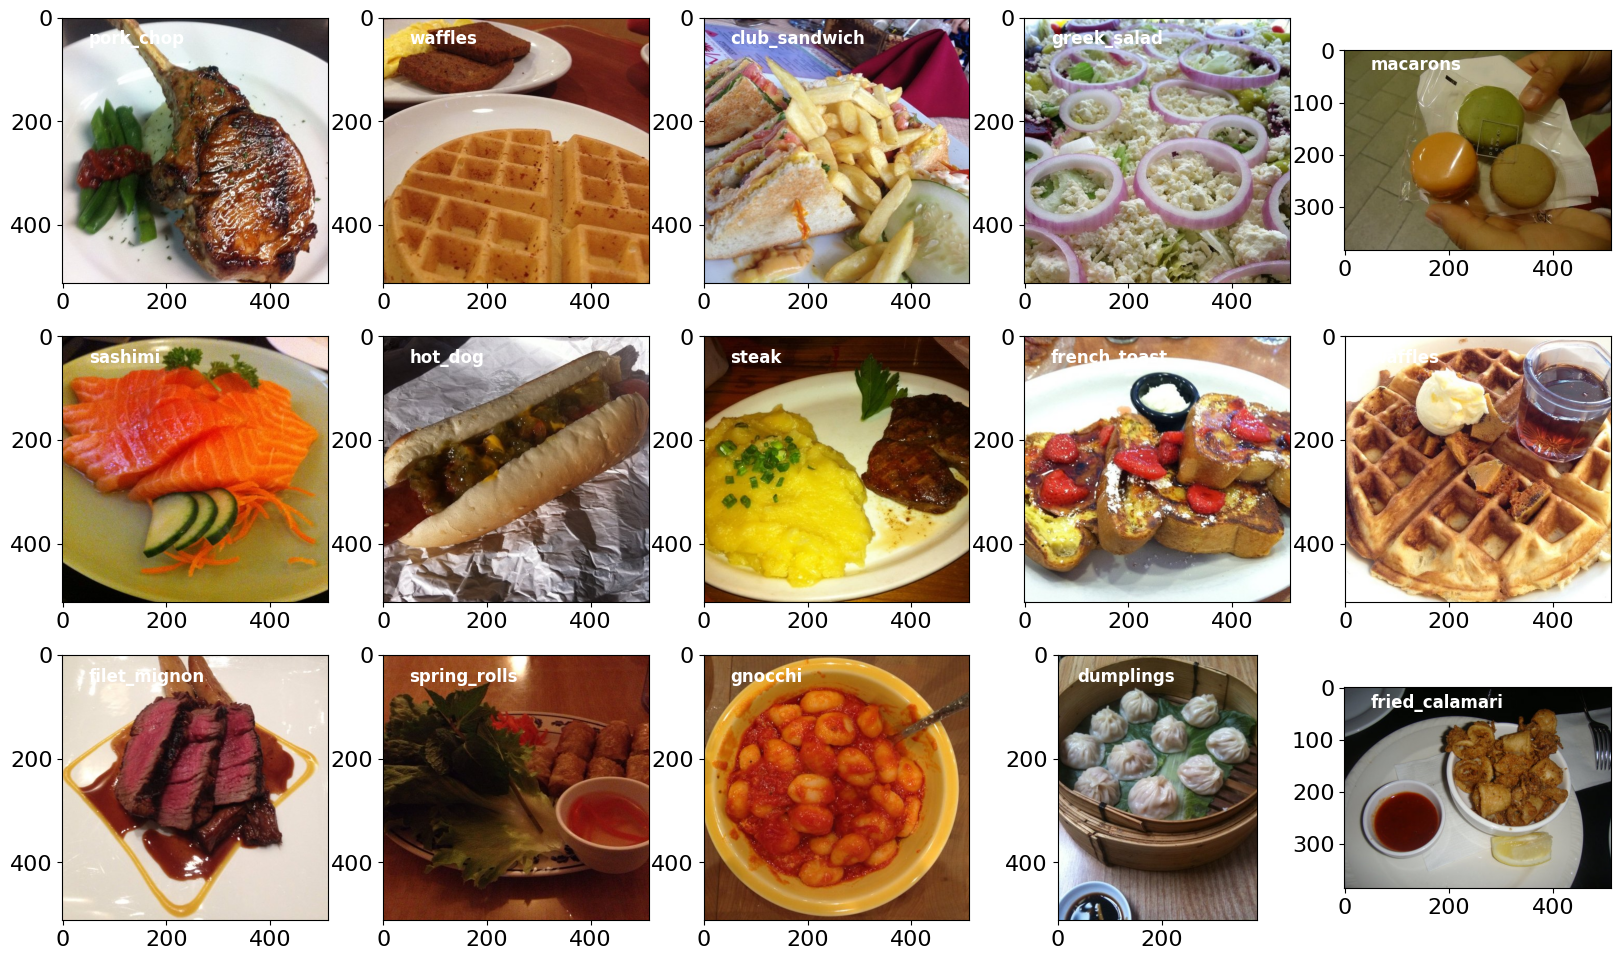

In [ ]:

"""
Now we will look at some samples of the dataset.
    To be specific this code does the following steps :
      1) takes path of a single random sample from filedf
      2) finds the corresponding TumorName by looking at its folder name and its mapping in the TypeMap
      3) opens the image thats at the path
      4) creates a plot of 5*5 subplots
      5) annotates the image
      6) displays the images
"""

plt.figure( figsize = (20,20) )

for i in range(15) :
  path = filedf.sample(1)['imagepath'].values[0]
  types = path.split("/")[3]
  example = Image.open(path)
  ax = plt.subplot(5,5, i+1)
  ax.annotate( types, xy = (0.1, 0.9), xycoords = 'axes fraction', color = 'white', weight = 'heavy', size = 12 )
  ax.imshow(example)

plt.show()

In [ ]:
print("Dataframe length :", len(filedf))

Dataframe length : 10100


In [ ]:
print("Total Samples : ", filedf.types.value_counts().sum())

Total Samples :  10100


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    filedf, filedf['types'], stratify = filedf['types'], test_size = 0.4
)

X_test, X_val, Y_test, Y_val = train_test_split(
    X_test, X_test['types'], stratify = X_test['types'], test_size = 0.5
)

In [ ]:
len(X_train) == len(Y_train) and len(X_test) == len(Y_test)

True

In [ ]:
# Now, we will tag the splitted datasets with their purpose or rather 'use';
X_train['use'] = 'train'
X_val['use'] = 'val'
X_test['use'] = 'test'

In [ ]:
# concatenate the X datasets, let it be fulldf
fulldf = pd.concat([X_train, X_test, X_val])

In [ ]:
fulldf.use.value_counts()

train    6060
test     2020
val      2020
Name: use, dtype: int64

In [ ]:
fulldf.head()

,imagepath,types,use
69,/content/tinyfood/cup_cakes/344924.jpg,cup_cakes,train
49,/content/tinyfood/panna_cotta/1856223.jpg,panna_cotta,train
32,/content/tinyfood/deviled_eggs/2559972.jpg,deviled_eggs,train
44,/content/tinyfood/pizza/344397.jpg,pizza,train
12,/content/tinyfood/french_onion_soup/3861105.jpg,french_onion_soup,train


In [ ]:
fulldf.types.value_counts()[0] / len(fulldf)

0.009900990099009901

In [ ]:
## for any repeated notebook runs, only has any effects if makedirectory ahead was executed once
!rm -rf data # make a data directory
!rm -rf data/ # remove any subdirectories forcefully
!rm -rf data/train
!rm -rf data/test
!rm -rf data/val


# runs always
!mkdir data/
!mkdir data/train
!mkdir data/test
!mkdir data/val

# Directories are blank right now

In [ ]:
fulldf.types.unique()

array(['cup_cakes', 'panna_cotta', 'deviled_eggs', 'pizza',
       'french_onion_soup', 'pad_thai', 'chicken_curry', 'baklava',
       'french_fries', 'pork_chop', 'spaghetti_bolognese', 'falafel',
       'huevos_rancheros', 'grilled_salmon', 'chocolate_mousse',
       'foie_gras', 'mussels', 'beignets', 'tuna_tartare',
       'lobster_roll_sandwich', 'hamburger', 'beef_tartare',
       'creme_brulee', 'baby_back_ribs', 'nachos', 'hot_and_sour_soup',
       'filet_mignon', 'paella', 'bread_pudding', 'tiramisu',
       'garlic_bread', 'ravioli', 'crab_cakes', 'oysters', 'greek_salad',
       'ice_cream', 'macaroni_and_cheese', 'sashimi', 'chicken_wings',
       'samosa', 'fried_rice', 'lasagna', 'apple_pie', 'red_velvet_cake',
       'hummus', 'club_sandwich', 'scallops', 'gyoza', 'peking_duck',
       'cannoli', 'takoyaki', 'eggs_benedict', 'hot_dog', 'prime_rib',
       'poutine', 'gnocchi', 'frozen_yogurt', 'ramen', 'chocolate_cake',
       'omelette', 'carrot_cake', 'caprese_salad',

In [ ]:
# make classes folder within train, test and val folders
for types in fulldf.types.unique():
  os.system(f"mkdir data/train/'{types}'")
  os.system(f"mkdir data/test/'{types}'")
  os.system(f"mkdir data/val/'{types}'")

In [ ]:
"""
Now, we will copy the files from original location to their
correspoinding folders based on their uses, that is test, train or val
"""

for i, row in fulldf.iterrows(): # returns an iter of (index, rows)
  # Tumor Category
  typ = row['types']

  # section is whether its train, test or val
  section = row['use']

  #input filepath to copy from
  ipath = row['imagepath']

  #output filepath to paste to ( we are creating the destination path)
  opath = ipath.replace(f"/content/tinyfood/", f"data/{section}/")

  # finally copying the files from 'ipath' to 'opath'
  os.system(f"cp '{ipath}' '{opath}'")

In [ ]:
import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import models
import torch.nn as nn

from torchvision import transforms, datasets, models
import torch
from torch import optim, cuda
import torch.optim as optim
from torch.utils.data import DataLoader, sampler
import torch.nn as nn
import numpy as np
import tqdm

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image

from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

In [ ]:
from torch import Tensor, nn
from torch.nn.functional import interpolate

In [ ]:
def imshow_tensor(image, ax = None, title = None):
  """ Imshow for tensor
    Args:
    image: A PyTorch tensor of the image to be displayed
    ax:    An optional matplotlib axis object to be used for displaying the image.
    title: An optional title to be displayed above the image.

    Returns:
    plot and image
    displays the image
  """
  if ax is None :
    fig, ax = plt.subplots()

    # Set the color channel as the third dimension because,
    # imshow expects(heigth, width, channel) whereas PyTorch represents img as (channels, height, width)
  image = image.numpy().transpose((1, 2, 0))

  # Reverse the preprocessing steps to denormalize the img
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  image = std * image + mean # Undoing the normalization

  # clip the image pixel values
  image = np.clip(image, 0, 1)

  ax.imshow(image)
  plt.axis('off')

  return ax, image


In [ ]:
traindir = f"/content/data/train"
validdir = f"/content/data/val"
testdir = f"/content/data/test"

In [ ]:
os.listdir('/content/data/train/')

['bread_pudding',
 'garlic_bread',
 'clam_chowder',
 'takoyaki',
 'bruschetta',
 'beignets',
 'paella',
 'lobster_bisque',
 'hamburger',
 'ramen',
 'french_onion_soup',
 'hummus',
 'foie_gras',
 'club_sandwich',
 'sushi',
 'french_toast',
 'caesar_salad',
 'bibimbap',
 'fried_calamari',
 'falafel',
 'samosa',
 'cup_cakes',
 'caprese_salad',
 'frozen_yogurt',
 'sashimi',
 'chicken_wings',
 'tuna_tartare',
 'tiramisu',
 'dumplings',
 'onion_rings',
 'strawberry_shortcake',
 'nachos',
 'huevos_rancheros',
 'chicken_curry',
 'oysters',
 'peking_duck',
 'gyoza',
 'omelette',
 'ceviche',
 'cheesecake',
 'beef_carpaccio',
 'gnocchi',
 'fish_and_chips',
 'pho',
 'macarons',
 'hot_dog',
 'pad_thai',
 'pizza',
 'pancakes',
 'chocolate_mousse',
 'seaweed_salad',
 'deviled_eggs',
 'creme_brulee',
 'spaghetti_carbonara',
 'steak',
 'tacos',
 'escargots',
 'greek_salad',
 'crab_cakes',
 'poutine',
 'grilled_salmon',
 'spring_rolls',
 'fried_rice',
 'filet_mignon',
 'panna_cotta',
 'carrot_cake',
 'e

In [ ]:
save_file_name = f'resnet50-transer.pt'
checkpoint_path = f'resnet50-transer.pth'

# Changes for hardware

batch_size = 512

multi_gpu = False ## I am running this on colab, i dont really need to handle multiple GPU, but its neverthless good to have

# whether to train on a gpu
train_on_gpu = cuda.is_available()
print(f'Train on GPU : {train_on_gpu}' )

# Number of GPU's

if train_on_gpu:
  gpu_count = cuda.device_count()
  print(f'{gpu_count} gpus detected.')
  if gpu_count > 1:
    multi_gpu = True
  else :
    multi_gpu = False

print(train_on_gpu, multi_gpu)


Train on GPU : True
1 gpus detected.
True False


In [ ]:
image_transforms = {
    # Train uses data augmentation
    'train' : transforms.Compose([
        transforms.RandomResizedCrop( size = 256, scale = (0.8, 1.0)),
        transforms.RandomRotation(degrees = 30),
        transforms.ColorJitter(),
        transforms.CenterCrop( size = 224 ), # ImageNet Standard
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                            [0.229, 0.224, 0.225]) # ImageNet Standard
    ]),

    # Validation doesnt use augmentaion
    'valid' : transforms.Compose([
        transforms.Resize( size = 256 ),
        transforms.CenterCrop( size = 224 ),
        transforms.ToTensor(),
        transforms.Normalize( [0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),

    # Test does not use Augmentation
    'test' : transforms.Compose([
        transforms.Resize(size = 256),
        transforms.CenterCrop(size = 224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

In [ ]:

# ex_img = Image.open('/content/data/train/apple_pie/116697.jpg').convert('RGB') # Omit the Convert('RGB') if you are working with JPEGs1
# # print(np.array(ex_img).shape, type(ex_img))

# trans = image_transforms['train']

# plt.figure(figsize = (10,10) )

# for i in range(16):
#   ax = plt.subplot( 4, 4, i+1)
#   img = trans(ex_img)
#   _ = imshow_tensor(img, ax = ax)

# plt.tight_layout()

In [ ]:

"""
Now we will create a dictionary with 3 torchvision.ImageFolder object,
for 3 keys of train, valid, and test we have a ImageFolder object,
this ImageFolder object expects 2 arguments, a root parameter which expects directorypath from where the image is to be taken,
a transform parameter which expects a transform object consisting of a sequence of transformations to be applied to all the images in the root directory
"""
data = {
    'train' : datasets.ImageFolder( root = traindir, transform = image_transforms['train']),
    'valid' : datasets.ImageFolder( root = validdir, transform = image_transforms['valid']),
    'test'  : datasets.ImageFolder( root = testdir, transform = image_transforms['test'])
}

# Data Loader iterators, make sure to shuffle
dataloaders = {
    'train' : DataLoader( data['train'], batch_size = batch_size, shuffle = True, num_workers = 0),
    'val' : DataLoader( data['valid'], batch_size = batch_size, shuffle = True, num_workers = 0),
    'test' : DataLoader( data['test'], batch_size = batch_size, shuffle = True, num_workers = 0)
}

In [ ]:
# Iterate trhough the dataloader once
"""
The next(trainiter) returns two things :
1) features : a (batch_size, channel, heigth, width) tensor container 'batch_size' number of images
2) labels   : a (batch_size,) vector with the true labels of of respective images in features
"""

trainiter = iter(dataloaders['train'])
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([512, 3, 224, 224]), torch.Size([512]))

In [ ]:
categories = []
for d in os.listdir(traindir):
  categories.append(d)

n_classes = len(categories)
print(f'There are {len(categories)} calsses of food.')

There are 101 calsses of food.


In [ ]:

class_to_idx = data['train'].class_to_idx
idx_to_class = {
    idx: class_
    for class_, idx in data['train'].class_to_idx.items()
}

In [ ]:
train_cnts = Counter([idx_to_class[x] for x in data['train'].targets])
val_cnts = Counter([idx_to_class[x] for x in data['valid'].targets])
test_cnts = Counter([idx_to_class[x] for x in data['test'].targets])


In [ ]:
train_cnts = pd.DataFrame({'cat' :list(train_cnts.keys()), 'train_cnt': list(train_cnts.values())})
val_cnts = pd.DataFrame({'cat' :list(val_cnts.keys()), 'val_cnt': list(val_cnts.values())})
test_cnts = pd.DataFrame({'cat' :list(test_cnts.keys()), 'test_cnt': list(test_cnts.values())})


In [ ]:
cnt_df = pd.merge(train_cnts,val_cnts,on='cat',how='left').merge(test_cnts,on='cat',how='left')


In [ ]:
cnt_df.head()


,cat,train_cnt,val_cnt,test_cnt
0,apple_pie,60,20,20
1,baby_back_ribs,60,20,20
2,baklava,60,20,20
3,beef_carpaccio,60,20,20
4,beef_tartare,60,20,20


In [ ]:
model = models.resnet50( pretrained = True )

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 320MB/s]


In [ ]:
# Freeze model weights
for param in model.parameters():
    param.requires_grad = False


In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# here we are saving the number of in_features of fully connected last layer, this will be useful ahead while defining new fc layer
n_inputs = model.fc.in_features
# n_inputs = 2048

In [ ]:

model.fc = nn.Sequential(
                      nn.Linear(n_inputs, 256),
                      nn.ReLU(),
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes),
                      nn.LogSoftmax(dim=1))

In [ ]:
model.fc

Sequential(
  (0): Linear(in_features=2048, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=101, bias=True)
  (4): LogSoftmax(dim=1)
)

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')


24,058,533 total parameters.
550,501 training parameters.


In [ ]:

# checking if the training should be on gpu, if yes, then the model is moved to gpu device, and if multiple gpus are present, then the training is done parallely
if train_on_gpu :
  model = model.to('cuda')
if multi_gpu :
  model = nn.DataParallel(model)


In [ ]:

if multi_gpu:
    print('multi GPU ', model.module.fc)
else:
    print('single GPU', model.fc)


single GPU Sequential(
  (0): Linear(in_features=2048, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=101, bias=True)
  (4): LogSoftmax(dim=1)
)


In [ ]:

model.class_to_idx = data['train'].class_to_idx
model.idx_to_class = {
    idx: class_
    for class_, idx in model.class_to_idx.items()
}

list(model.idx_to_class.items())[:10]

[(0, 'apple_pie'),
 (1, 'baby_back_ribs'),
 (2, 'baklava'),
 (3, 'beef_carpaccio'),
 (4, 'beef_tartare'),
 (5, 'beet_salad'),
 (6, 'beignets'),
 (7, 'bibimbap'),
 (8, 'bread_pudding'),
 (9, 'breakfast_burrito')]

In [ ]:
criterion = nn.NLLLoss()
# optimizer = optim.Adam(model.parameters())
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
for p in optimizer.param_groups[0]['params']:
  if p.requires_grad:
    print(p.shape)

torch.Size([256, 2048])
torch.Size([256])
torch.Size([101, 256])
torch.Size([101])


In [ ]:
def train(model,
          criterion,
          optimizer,
          train_loader,
          valid_loader,
          save_file_name,
          max_epochs_stop=3,
          n_epochs=20,
          print_every=1):
    """Train a PyTorch Model

    Params
    --------
        model (PyTorch model): cnn to train
        criterion (PyTorch loss): objective to minimize
        optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
        train_loader (PyTorch dataloader): training dataloader to iterate through
        valid_loader (PyTorch dataloader): validation dataloader used for early stopping
        save_file_name (str ending in '.pt'): file path to save the model state dict
        max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
        n_epochs (int): maximum number of training epochs
        print_every (int): frequency of epochs to print training stats

    Returns
    --------
        model (PyTorch model): trained cnn with best weights
        history (DataFrame): history of train and validation loss and accuracy
    """

    # Early stopping intialization
    epochs_no_improve = 0
    valid_loss_min = np.Inf

    valid_max_acc = 0
    history = []

    # Number of epochs already trained (if using loaded in model weights)
    try:
        print(f'Model has been trained for :  {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')

    overall_start = timer()

    # Main loop
    for epoch in range(n_epochs):

        # keep track of training and validation loss each epoch
        train_loss = 0.0
        valid_loss = 0.0

        train_acc = 0
        valid_acc = 0

        # Set to training
        model.train()
        start = timer()

        # Training loop
        for ii, (data, target) in enumerate(train_loader):
            # Tensors to gpu
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()

            # Clear the previous epochs gradients
            optimizer.zero_grad()

            # Predicted outputs are log probabilities
            # Due to the fc layer the predicted outputs are probabilities in log or logits
            output = model(data)

            # Loss of predicted outputs and target labels
            loss = criterion(output, target)

            # backpropagation of loss
            loss.backward()

            # Update the parameters based on the computed gradients and optimizers learning rate
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)

            # Calculate accuracy by finding max log probability
            _, pred = torch.max(output, dim=1)
            correct_tensor = pred.eq(target.data.view_as(pred))

            # Need to convert correct tensor from int to float to average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))

            # Multiply average accuracy times the number of examples in batch
            train_acc += accuracy.item() * data.size(0)

            # Track training progress
            print(
                f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
                end='\r')

        # After training loops ends, start validation
        else:
            model.epochs += 1

            # Don't need to keep track of gradients
            with torch.no_grad():
                # Set to evaluation mode
                model.eval()

                # Validation loop
                for data, target in valid_loader:
                    # Tensors to gpu
                    if train_on_gpu:
                        data, target = data.cuda(), target.cuda()

                    # Forward pass
                    output = model(data)

                    # Validation loss
                    loss = criterion(output, target)
                    # Multiply average loss times the number of examples in batch
                    valid_loss += loss.item() * data.size(0)

                    # Calculate validation accuracy
                    _, pred = torch.max(output, dim=1)
                    correct_tensor = pred.eq(target.data.view_as(pred))
                    accuracy = torch.mean(
                        correct_tensor.type(torch.FloatTensor))
                    # Multiply average accuracy times the number of examples
                    valid_acc += accuracy.item() * data.size(0)

                # Calculate average losses
                train_loss = train_loss / len(train_loader.dataset)
                valid_loss = valid_loss / len(valid_loader.dataset)

                # Calculate average accuracy
                train_acc = train_acc / len(train_loader.dataset)
                valid_acc = valid_acc / len(valid_loader.dataset)

                history.append([train_loss, valid_loss, train_acc, valid_acc])

                # Print training and validation results
                if (epoch + 1) % print_every == 0:
                    print(
                        f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f}        \tValidation Loss: {valid_loss:.4f}'
                    )
                    print(
                        f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                    )

                # Save the model if validation loss decreases
                if valid_loss < valid_loss_min:
                    # Save model
                    torch.save(model.state_dict(), save_file_name)
                    # Track improvement
                    epochs_no_improve = 0
                    valid_loss_min = valid_loss
                    valid_best_acc = valid_acc
                    best_epoch = epoch

                # Otherwise increment count of epochs with no improvement
                else:
                    epochs_no_improve += 1
                    # Trigger early stopping
                    if epochs_no_improve >= max_epochs_stop:
                        print(
                            f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                        )
                        total_time = timer() - overall_start
                        print(
                            f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                        )

                        # Load the best state dict
                        model.load_state_dict(torch.load(save_file_name))

                        # Attach the optimizer
                        model.optimizer = optimizer

                        # Format history
                        history = pd.DataFrame(
                            history,
                            columns=[
                                'train_loss', 'valid_loss', 'train_acc',
                                'valid_acc'
                            ])
                        return model, history
    # Attach the optimizer
    model.optimizer = optimizer
    # Record overall time and print out stats
    total_time = timer() - overall_start
    print(
        f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
    )
    print(
        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch):.2f} seconds per epoch.'
    )
    # Format history
    history = pd.DataFrame(
        history,
        columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])
    return model, history

In [ ]:
model, history = train(
    model,
    criterion,
    optimizer,
    dataloaders['train'],
    dataloaders['val'],
    save_file_name = save_file_name,
    max_epochs_stop = 3,
    n_epochs = 30,
    print_every = 1)

Starting Training from Scratch.


Epoch: 0 	Training Loss: 4.6268        	Validation Loss: 4.6204
		Training Accuracy: 1.12%	 Validation Accuracy: 0.74%

Epoch: 1 	Training Loss: 4.6207        	Validation Loss: 4.6145
		Training Accuracy: 1.09%	 Validation Accuracy: 0.94%
